### Before importing you need to install pygmaps library

In [1]:
from time import sleep
import numpy as np
import pygmaps
from geopy.geocoders import Nominatim
from copy import deepcopy
from pandas import DataFrame
from matplotlib import pyplot as plt

KeyboardInterrupt: 

### Here is the function that returns the lattitude and longitude

In [16]:
def geoGrab(address):
    geolocator = Nominatim(user_agent="my-application")
    location = geolocator.geocode(address)
    if location is not None:
        loc = {}
        loc['latitude'] = location.latitude
        loc['longitude'] = location.longitude
        return loc
    else:
        return None


In [17]:
geoGrab('Kazybek Bi St, Almaty')

{'latitude': 43.2570222, 'longitude': 76.9516973}

### Fill out this function placeFind()

In [18]:
def placeFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        address = line.split('\t')[-1].replace("\n", "")
        # read rows and take their exact address 
        # use geoGrab which returns a location stored in a dictionary format
        loc = geoGrab(address)
        if loc==None:
            print("!!! Something went wrong! Cannot find {}".format(address))
        else:
            fw.write("{}\t{}\n".format(address, loc))
#         if 'everything is ok':
#             # write the longitude and latitude to places.txt
#         else:
#             # inform about error
        sleep(2) # the time pause needed as it takes some time to connect through Google API and find location
    fw.close()



In [4]:
placeFind("almatyPlaces.txt")

!!! Something went wrong! Cannot find Rozybakiev St 277
!!! Something went wrong! Cannot find Almaty, ul. Shevchenko, 204
!!! Something went wrong! Cannot find Almaty, ul. Kabanbay Batyra, 83


### Write your own function k-means:

In [5]:
def clusterPlaces(k, data):
    n = data.shape[0]
    c = data.shape[1]

    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    plt.subplot(2, 2, 1)
    plt.scatter(data[:,0], data[:,1], s=7)
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

    centers_old = np.zeros(centers.shape)
    centers_new = deepcopy(centers)

    data.shape
    clusters = np.zeros(n)
    distances = np.zeros((n,k))

    error = np.linalg.norm(centers_new - centers_old)

    while error != 0:
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        clusters = np.argmin(distances, axis = 1)

        centers_old = deepcopy(centers_new)
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)

    plt.subplot(2, 2, 3)
    plt.scatter(data[:,0], data[:,1], s=7)
    plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
    
    return centers_new


In [12]:
def getData(fileName):
    l = []
    for line in open(fileName).readlines():
        loc = line.split('\t')[-1].replace("\n", "")
        l.append(eval(loc))
    return DataFrame(l).values, DataFrame(l)

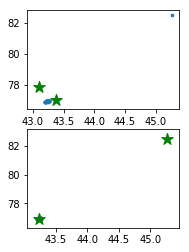

In [13]:
# Something wrong with Almaty Dostyk 123/8	{'latitude': 45.256062, 'longitude': 82.492783}
places, df  = getData('places.txt')
b = clusterPlaces(2, places)

In [14]:
def map_it(*args):
    maps = pygmaps.gmaps.maps(df.latitude.mean(), df.longitude.mean())
    for arg in args:
        for i in arg:
            maps.add_point(i[0], i[1])
    maps.draw("my_map.html")
map_it(places, b)

In [10]:
from pygmaps import gmaps

At the end you need to obtain html file with points on the maps